<a href="https://colab.research.google.com/github/NajmehNyr/Social-Status-/blob/main/social.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd; pd.set_option('future.no_silent_downcasting', True)

import scipy.stats as stats
%pip install pingouin
import pingouin as pg

import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1HiCx_IS2t0PLg1Blmw5XmmFyXS6oQl3H/export?format=csv'
df = pd.read_csv(url)

df.head()

,ID,GENDER,MARR,RELIBIL,FAMINC,PERSINC,RESID,FATEDU,UNNES,ENTER,...,SOCMED,FRI,science,politics,culture,religon,others,nothing,FAMCOM,EDUCOM
0,1,1,1,2,30,0,3,3,۵۰ الی ۷۰ درصد,۱ الی ۳ میلیون تومان,...,۱ تا ۳ ساعت,متوسط,علمی,NaN,فرهنگی,NaN,NaN,NaN,1,3
1,2,1,1,3,60,0,4,2,۳۰ الی ۵۰ درصد,۱ الی ۳ میلیون تومان,...,۱ تا ۳ ساعت,متوسط,NaN,NaN,فرهنگی,NaN,NaN,NaN,2,4
2,3,1,1,3,15,0,2,1,۳۰ الی ۵۰ درصد,زیر ۱ میلیون تومان,...,بالای ۵ ساعت,زیاد,NaN,NaN,NaN,NaN,NaN,هیچکدام,1,2
3,4,1,1,2,17.5,0,3,1,۷۰ الی ۱۰۰ درصد,زیر ۱ میلیون تومان,...,۱ تا ۳ ساعت,متوسط,علمی,NaN,NaN,NaN,NaN,NaN,2,3
4,5,1,1,3,14,0,3,3,۵۰ الی ۷۰ درصد,زیر ۱ میلیون تومان,...,۱ تا ۳ ساعت,زیاد,NaN,NaN,NaN,NaN,سایر,NaN,1,2


**The Dataset:** This analysis belongs to Social Status dataset of psychology class of 2028 of University of X. We gathered the data in our first semester so there were many mistakes in the designed survey in that time I was the Data Analysist of this team and I alnalyzied the data in Excel.

**The Varibles**: Click here.

#Preprocessing

###Correcting Data Coleoctor's Mistakes

Here, I will correct some of the data collector's mistakes, so having a bigger number on the scale means better performance in that task. At the same time, I will also convert my strings to numerical values, especially since they are Persian.

In [ ]:
# Replace values with new ones
# in 2 first ones: sort unique values then give them ordinal numbrs that increas by 1
REPs = {
    'UNNES':  {ValUnn: IndUnn + 1 for IndUnn, ValUnn in enumerate(np.sort(df['UNNES'].unique()))},
    'ENTER':  {ValEnt: IndEnt + 1 for IndEnt, ValEnt in enumerate(np.sort(df['ENTER'].unique()))},
    'READ':   {'زیر یکساعت': 1, 'یک تا سه ساعت': 2, 'سه تا هفت': 3, 'بالای هفت ساعت...': 4},
    'SPORT':  {'خیر ، فاقد مهارت ورزشی': 1, 'در حد مبتدی': 2, 'در حد متوسط': 3, 'بله ، در حد عالی': 4},
    'ENG':    {'فاقد آشنایی': 1, 'در حد کم': 2, 'متوسط': 3, 'زیاد': 4, 'عالی': 5},
    'VOUL':   {'خیلی ضعیف': 1, 'ضعیف': 2, 'متوسط': 3, 'خوب': 4},
    'SOCMED': {'زیر ۱ ساعت': 1, '۱ تا ۳ ساعت': 2, '۳ تا ۵ ساعت': 3, 'بالای ۵ ساعت': 4},
    'FRI':    {'خیلی کم': 1, 'کم': 2, 'متوسط': 3, 'زیاد': 4},
    'FAMCOM': {1: 3, 3: 1},
    'RESID':  {1: 5, 2: 4, 4: 2, 5: 1}}
df = df.replace(REPs)


**Combining and Dropping Some of The Columns**

There are six columns related to the type of NGOs individuals are involved in.

`NGO_Types = ['science', 'culture', 'religion', 'politics', 'others', 'nothing']`.
I will count involvement in each of these columns, except for `NGO_Types['nothing']`, and then create a column named "NGOs" for them.

The nothing column isn't needed here, so I will drop it alongside marriage status since none of the individuals is married in our survey.

In [ ]:
# Envolvment in NGOs count
NGOs = ['science', 'culture', 'religon', 'politics', 'others']
for NGO in NGOs: #fill NaNs with 0 and none NaNs with 1
  df[NGO] = df[NGO].fillna(0).apply(lambda x: 1 if x != 0 else 0)
df['NGONUM'] = df[NGOs].sum(axis=1)

# Drop cloumns that are useless or not needed anymore
df.drop(['nothing', 'MARR'] + NGOs, axis=1, inplace=True)

### Handeling Missing Data

Here after I turned all my data points to numeric values I search for missing data points and fill those with appropriate values.

Columns with missing data:
*   Family Income: Median due that varibility.
*   Person's Income: 0 beacuse most of the indivisouls didn't make any money so if they didn't answer this they probebly were the same.


In [ ]:
# Convert columns to numeric, coercing errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Fill missing values
df['FAMINC'] = df['FAMINC'].fillna(df['FAMINC'].median())
df.at[30, "PERSINC"] = 0
df['COMP'] = df['COMP'].fillna(df['COMP'].mean()).astype(int)

In [ ]:
# Check if there're any null values left
NullLen = df.isnull().sum()
NullCol = NullLen[NullLen > 0]
if not NullCol.empty: print(f"Columns with remaining null values: {NullCol}")

### Convering All the Values to Scores

**Income varibles**: We ask pepole how much they make per month (million Rial) but those valuses need to be transfered to scores.

**Personal Income**: Only a minority had thier own outcome we have 3 scores for Personal income and 5 for Family Income.

In [ ]:
# specifying the cuts, for FAMINC create 5 cuts and 3 fpr PERSINC
FamincCuts = [np.min(df['FAMINC']) + faminc_i * (np.ptp(df['FAMINC']) / 5) for faminc_i in range(6)]
FamincCuts[-1] = np.max(df['FAMINC']) + 1 #just for fixing a minor error
PersincCuts = [0, 5, 10, 51]

# Labeling and cuts the values
df['FAMINC_SCORE'] = pd.cut(df['FAMINC'], bins=FamincCuts, labels=[1, 2, 3, 4, 5], right=False, include_lowest=True)
df['PERSINC_SCORE'] = pd.cut(df['PERSINC'], bins=PersincCuts, labels=[1, 2, 3], right=False, include_lowest=True)

df['FAMINC_SCORE'] = df['FAMINC_SCORE'].astype(int)
df['PERSINC_SCORE'] = df['PERSINC_SCORE'].astype(int)

### Creating Our Main Varibles

In this project we aim to mesure the classes economical, social and cultural score to compare each persons socoeconomical score to others. for that, we need those to be our main varible. and in one varible we combine social and cultural score. we also add an overall score for the overall analysis.

In [ ]:
# Create main vaibles dict and get teir mean
vars= {
    'ECO': {'FAMINC_SCORE', 'PERSINC_SCORE', 'RESID' , 'UNNES' , 'ENTER' ,  'JOBEXP'       },
    'CUL': {'GENDER'      , 'RELIBIL'      , 'FATEDU', 'READ'  , 'SPORT' ,  'COMP'  , 'ENG'},
    'SOC': {'VOUL'        , 'SOCMED'       , 'FRI'   , 'NGONUM', 'FAMCOM',  'EDUCOM'       }}
for Var, SubVar in vars.items():
  df[Var] = df[list(SubVar)].mean(axis=1)

In [ ]:
# Create Additioal varibles
df['SOCCUL'] = df[['CUL', 'SOC']].mean(axis=1)
df['OVERALL'] = df[['ECO', 'CUL', 'SOC']].mean(axis=1)
ADDITIONAL = ['SOCCUL', 'OVERALL']

# Rearrange the data[ID and INCS + vars[subvars] + list(vars) + ADDITIONAL]
NewOrder = ['ID', 'PERSINC', 'FAMINC'] + [subvar for var in vars.keys() for subvar in list(vars[var])] + list(vars.keys()) + ADDITIONAL
df = df[NewOrder]

### Caculating min and max

The theorical min and max are diffrent with the ones particioants actually choosee, so I caculated the reah min and max for normalization.

In [ ]:
# Write min and max based on survey options
MinMax = {'GENDER':[1,2], 'RELIBIL':[1,5], 'SPORT':[1,4]      , 'RESID':[1,5]  ,
          'FATEDU':[1,5],'UNNES':[1,4]   , 'ENTER':[1,4]       , 'JOBEXP':[1,3]      , 'READ':[1,4]   ,
          'COMP':[1,4]  , 'ENG':[1,5]    , 'VOUL':[1,5]        ,'SOCMED':[1,4]       , 'FRI':[1,5]    ,
          'EDUCOM':[1,5], 'NGONUM':[0,5] , 'FAMINC_SCORE':[1,5],'PERSINC_SCORE':[1,3],  'FAMCOM':[1,3],
          'FAMINC':[df['FAMINC'].min(), df['FAMINC'].max()],
          'PERSINC':[df['PERSINC'].min(), df['PERSINC'].max()]}

In [ ]:
# 1: Calculate min and max based on minmax dict

# For Vars
VarMin = [MinMax[SubVarm][0] for SubVarm in SubVar]
VarMax = [MinMax[SubVarm][1] for SubVarm in SubVar]
MinMaxVars = {Var: (np.mean(VarMin), np.mean(VarMax))
              for Var, SubVar in vars.items()}

# For ADDITIONALs
SOCCULMin = [MinMaxVars['SOC'][0], MinMaxVars['CUL'][0]]
SOCCULMax = [MinMaxVars['SOC'][1], MinMaxVars['CUL'][1]]

OVERALLMin = [MinMaxVars['ECO'][0], MinMaxVars['CUL'][0], MinMaxVars['SOC'][0]]
OVERALLMax = [MinMaxVars['ECO'][1], MinMaxVars['CUL'][1], MinMaxVars['SOC'][1]]

MinMaxAdd = {'SOCCUL': (np.mean(SOCCULMin), np.mean(SOCCULMax)),
             'OVERALL': (np.mean(OVERALLMin), np.mean(OVERALLMax))}


# 2: Updating the MInMAx dictionary with var means and additional means
MinMax.update(MinMaxVars)
MinMax.update(MinMaxAdd)
df.head()

,ID,PERSINC,FAMINC,RESID,ENTER,FAMINC_SCORE,PERSINC_SCORE,UNNES,JOBEXP,GENDER,...,NGONUM,VOUL,FAMCOM,FRI,EDUCOM,ECO,CUL,SOC,SOCCUL,OVERALL
0,1,0.0,30.0,3,3,2,1,3,1,1,...,2,3,3,3,3,2.166667,2.285714,2.666667,2.476190,2.373016
1,2,0.0,60.0,2,3,3,1,2,1,1,...,1,4,2,3,4,2.000000,1.857143,2.666667,2.261905,2.174603
2,3,0.0,15.0,4,2,1,1,2,3,1,...,0,2,3,4,2,2.166667,1.571429,2.500000,2.035714,2.079365
3,4,0.0,17.5,3,2,1,1,4,1,1,...,1,3,2,3,3,2.000000,2.571429,2.333333,2.452381,2.301587
4,5,0.0,14.0,3,2,1,1,3,1,1,...,1,3,3,4,2,1.833333,2.000000,2.500000,2.250000,2.111111


In [ ]:
df.to_csv('preprocessed_social_status.csv', index=False)

##Normalization

**Min-Max scaling**

I use Min-Max scaling becuse as I said theres diffrence between theorical and practical min and max which itself is important scince on one in our sample get more that 0.6 score in economics and probebly reflects the high inflation rate and broken economics of Iran.

In addition, Varibles didn't used the same scaling. we had 1-2, 1-3, 1-4, 1-5 and seems resonable to use min max scaling which will also make data interpertation more undrestandble.

In [ ]:
# Define the min_max scaling fuction

def MMScaling(InpCol):

  Min = MinMax[InpCol.name][0]
  Max = MinMax[InpCol.name][1]
  MMScaled = (InpCol - Min) / (Max - Min)
  return MMScaled

In [ ]:
# Creating the Normalized Data Frame(ndf)
ndf = df.copy()

# Identify categories and columns to normalize
NCols = ['ECO', 'CUL', 'SOC', 'SOCCUL', 'OVERALL']
for var in vars.keys():
    NCols.extend(list(vars[var]))

# Convert columns to numeric and normalizing them
for col in NCols:
    ndf[col] = pd.to_numeric(ndf[col], errors='coerce')
    ndf[col] = MMScaling(ndf[col])
ndf.head()

,ID,PERSINC,FAMINC,RESID,ENTER,FAMINC_SCORE,PERSINC_SCORE,UNNES,JOBEXP,GENDER,...,NGONUM,VOUL,FAMCOM,FRI,EDUCOM,ECO,CUL,SOC,SOCCUL,OVERALL
0,1,0.0,30.0,0.50,0.666667,0.25,0.0,0.666667,0.0,0.0,...,0.4,0.50,1.0,0.50,0.50,0.363636,0.396104,0.500000,0.448052,0.419913
1,2,0.0,60.0,0.25,0.666667,0.50,0.0,0.333333,0.0,0.0,...,0.2,0.75,0.5,0.50,0.75,0.318182,0.279221,0.500000,0.389610,0.365801
2,3,0.0,15.0,0.75,0.333333,0.00,0.0,0.333333,1.0,0.0,...,0.0,0.25,1.0,0.75,0.25,0.363636,0.201299,0.454545,0.327922,0.339827
3,4,0.0,17.5,0.50,0.333333,0.00,0.0,1.000000,0.0,0.0,...,0.2,0.50,0.5,0.50,0.50,0.318182,0.474026,0.409091,0.441558,0.400433
4,5,0.0,14.0,0.50,0.333333,0.00,0.0,0.666667,0.0,0.0,...,0.2,0.50,1.0,0.75,0.25,0.272727,0.318182,0.454545,0.386364,0.348485


In [ ]:
# Reordering the Normalized Data Frame
ndfOG = ndf.columns
NewOrder2 = ['ID', 'PERSINC_SCORE', 'FAMINC_SCORE', 'ENTER', 'RESID', 'JOBEXP',
       'UNNES', 'GENDER', 'ENG', 'SPORT', 'FATEDU', 'RELIBIL',
       'COMP', 'READ', 'EDUCOM', 'SOCMED', 'FRI', 'NGONUM', 'FAMCOM', 'VOUL',
       'ECO', 'CUL', 'SOC', 'SOCCUL', 'OVERALL']
ndf = ndf[NewOrder2].round(4)
ndf.head()

,ID,PERSINC_SCORE,FAMINC_SCORE,ENTER,RESID,JOBEXP,UNNES,GENDER,ENG,SPORT,...,SOCMED,FRI,NGONUM,FAMCOM,VOUL,ECO,CUL,SOC,SOCCUL,OVERALL
0,1,0.0,0.25,0.6667,0.50,0.0,0.6667,0.0,0.50,0.6667,...,0.3333,0.50,0.4,1.0,0.50,0.3636,0.3961,0.5000,0.4481,0.4199
1,2,0.0,0.50,0.6667,0.25,0.0,0.3333,0.0,0.50,0.3333,...,0.3333,0.50,0.2,0.5,0.75,0.3182,0.2792,0.5000,0.3896,0.3658
2,3,0.0,0.00,0.3333,0.75,1.0,0.3333,0.0,0.25,0.3333,...,1.0000,0.75,0.0,1.0,0.25,0.3636,0.2013,0.4545,0.3279,0.3398
3,4,0.0,0.00,0.3333,0.50,0.0,1.0000,0.0,1.00,0.3333,...,0.3333,0.50,0.2,0.5,0.50,0.3182,0.4740,0.4091,0.4416,0.4004
4,5,0.0,0.00,0.3333,0.50,0.0,0.6667,0.0,0.50,0.3333,...,0.3333,0.75,0.2,1.0,0.50,0.2727,0.3182,0.4545,0.3864,0.3485


In [ ]:
if len(df.columns) == len(ndfOG): print('All the columns are in normalized df too.')
if len(ndf.columns) != len(ndfOG): print('Income Scores are removed.')

All the columns are in normalized df too.
Income Scores are removed.


In [ ]:
df.to_csv('normalized_social_status.csv', index=False)

#Analysis

In [ ]:
alpha5 = 0.05; alpha1 = 0.01

## Overview of Varibles Relationship

it seems a little unusual for economical factors and cultrual factors to have this much negetive relationship and much less positive relationship. The economical situation can be explained by broken economic system of Iran but for cultural matrix the only reason i can think of is the problem with honesty of participants but when we dive deeper we will see that it's acctually resonable. the Income corrlations isn't relible due to small number of people with personal income.

the economical situation is also visible in means (Eco = 0.36 , Soc = 0.48 , Cul = 0.42 ) which both are siggnifintly larger compare to Eco (p = 0.0007, p = 0.0146) in a two independent sample t test, but there's no siggnificant difrence between Soc and Cul. (p = 0.1029)

In [ ]:
print(ndf['ECO'].mean().round(2), ndf['CUL'].mean().round(2), ndf['SOC'].mean().round(2))

print(stats.ttest_ind(ndf['ECO'], ndf['CUL']).pvalue)
print(stats.ttest_ind(ndf['ECO'], ndf['SOC']).pvalue)

print(stats.ttest_ind(ndf['CUL'], ndf['SOC']).pvalue)

print(stats.skewtest(ndf['ECO']).pvalue)


0.36 0.42 0.48
0.014573534732515329
0.000695519994759975
0.10290223680760831
0.08968597057819609


In [ ]:
# @title
# 1: Extract main varibles and their subvaribles
main_vars = list(vars.keys())
eco_facs = list(vars[main_vars[0]])
cul_facs = list(vars[main_vars[1]])
soc_facs = list(vars[main_vars[2]])

# 2: calculate their corrlation matrix
varMat = ndf[main_vars].corr()
ecoMat = ndf[eco_facs].corr()
culMat = ndf[cul_facs].corr()
socMat = ndf[soc_facs].corr()

# 3: find the min and max corrlation in all corrMats
min_corr = min(varMat.min().min(), ecoMat.min().min(), culMat.min().min(), socMat.min().min())
max_corr = max(varMat.max().max(), ecoMat.max().max(), culMat.max().max(), socMat.max().max())

# 4: Create a function for calculating pvalue matrix of corr matrices
def pvalMat(corrMat):
  # Create an empty matrix
  pvalues = corrMat.copy()
  facs = (corrMat.columns); num_facs = len(facs)
  pvalMat = np.zeros((num_facs, num_facs))

  # Lopp trough it
  for col in range(num_facs):
    for row in range(col, num_facs):
      if col == row: pval = 1
      else: pval = stats.pearsonr(corrMat[facs[col]], corrMat[facs[row]])[1]
      pvalMat[col, row] = pval; pvalMat[row, col] = pval
  return pvalMat

Only 3 student have their own income. 



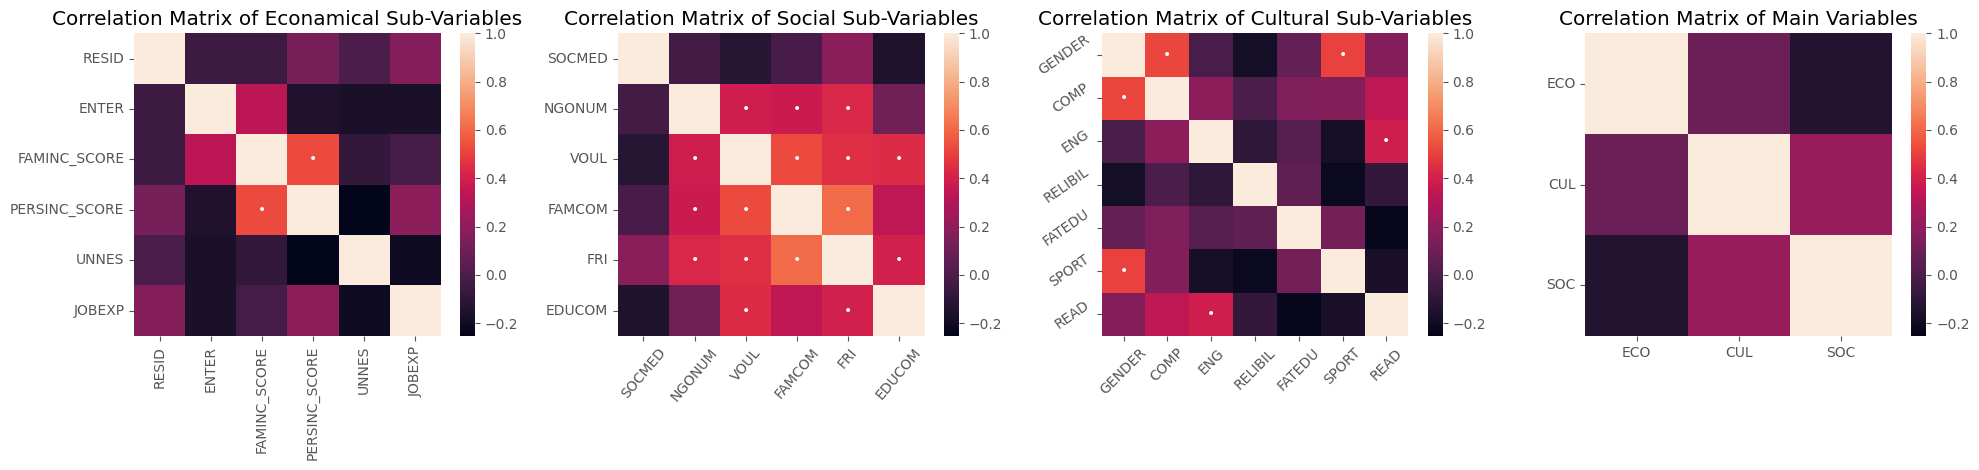

In [ ]:
# @title
print(f'Only {len(ndf[ndf["PERSINC_SCORE"] != 0])} student have their own income. \n')

fig, ax = plt.subplots(1, 4, figsize=(20, 4.8))

# Plot main variables heatmap
varPvals = pvalMat(ndf[main_vars])
varP_annot = np.where(varPvals < alpha5 , '•', '')
sns.heatmap(varMat, annot=varP_annot, ax=ax[3], fmt='s', vmin=min_corr, vmax=max_corr)
ax[3].set_title('Correlation Matrix of Main Variables')
ax[3].set_yticklabels(ax[3].get_yticklabels(), rotation=0)

# Plot sub-variables heatmaps
ecoPvals = pvalMat(ndf[eco_facs])
ecoP_annot = np.where(ecoPvals <= alpha5, '•', '')
sns.heatmap(ecoMat, annot=ecoP_annot, ax=ax[0], fmt='s', vmin=min_corr, vmax=max_corr)
ax[0].set_title('Correlation Matrix of Econamical Sub-Variables')

socPvals = pvalMat(ndf[soc_facs])
socP_annot = np.where(socPvals <= alpha5, '•', '')
sns.heatmap(socMat, annot=socP_annot, ax=ax[1], fmt='s', vmin=min_corr, vmax=max_corr)
ax[1].set_title('Correlation Matrix of Social Sub-Variables')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=50)

culPvals = pvalMat(ndf[cul_facs])
culP_annot = np.where(culPvals <= alpha5, '•', '')
sns.heatmap(culMat, annot=culP_annot, ax=ax[2], fmt='s', vmin=min_corr, vmax=max_corr)
ax[2].set_title('Correlation Matrix of Cultural Sub-Variables')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)
ax[2].set_yticklabels(ax[2].get_yticklabels(), rotation=35)


plt.tight_layout()
plt.show()

In [ ]:
# TODO cross corrlation

As we saw there's no siggificant relationship between our varibles.

but theres a almost doube diffrance

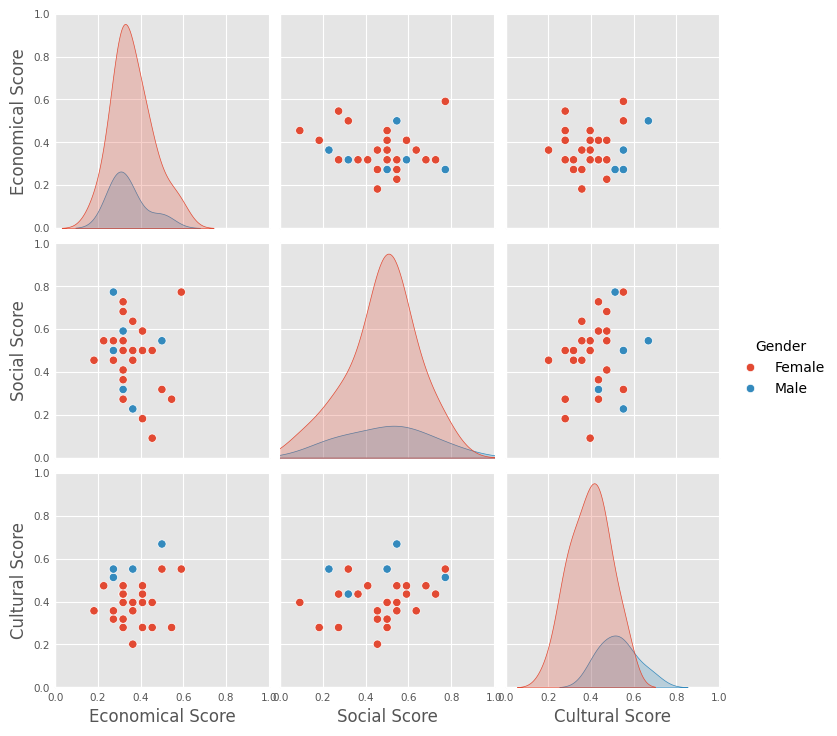

In [ ]:
# @title
# Map numerical gender to descriptive strings
gender = {1: 'Female', 2: 'Male'}
ndf['Gender'] = df['GENDER'].map(gender)

# plot the data
g = sns.pairplot(ndf[['ECO', 'SOC', 'CUL', 'Gender']], hue='Gender', kind='scatter')

axes = g.axes.flatten()
for ax in axes:
  ax.set_xlim(0, 1)
  ax.set_ylim(0, 1)
  ax.tick_params(labelsize=7.5, length=0.2)
  ax.grid(True)

axes[0].set(ylabel='Economical Score'); axes[8].set(xlabel='Cultural Score')
axes[3].set(ylabel='Social Score');     axes[7].set(xlabel='Social Score')
axes[6].set(ylabel='Cultural Score',    xlabel='Economical Score')

plt.show()
ndf.drop('Gender', axis=1, inplace=True)

In [ ]:
# # create a corrlation matrix that one axis in cultral and one social subvaribles and create heatmap
# culSocMat = ndf[cul_facs + soc_facs].corr()

# culSocPvals = pvalMat(culSocMat)
# culSocP_annot = np.where(culSocPvals <= alpha5, '•', '')
# sns.heatmap(culSocMat, annot=culSocP_annot, fmt='s', vmin=min_corr, vmax=max_corr)
# plt.title('Correlation Matrix of Social & Cultural Sub-Variables')
# plt.show()

In [ ]:
# 1: Train a cross clasification and train in each gender



In [ ]:
# 1: If   there's any relationship between eco and soc or cul
#    Then see if is significant and mesure how much of the realationship is explainble by it


# 2: See how much corrlated cul and soc are

## Normality of varibles


In [ ]:
# @title
def normTest(col):

    bigSamp = 30
    if  bigSamp <= len(col):
        test = stats.kstest(col, 'norm', args=(np.mean(col), np.std(col)))
    else:
        smallSamp = len(col)
        test = stats.shapiro(col)

    if test.pvalue >= alpha5: return 1
    else: return 0

In [ ]:
# @title
normCols =[]; nonNormCols = []
# numerical columns:
numCols = ndf.select_dtypes(include=np.number).columns[1:]

# 1: Testing distributions for normality
for col in numCols:
    normAns = normTest(ndf[col])
    if normAns == 0: nonNormCols.append(col)
    else: normCols.append(col)

# Ensure lists have the same length by filling with None
max_len = max(len(normCols), len(nonNormCols))
normColCopy = [col.lower() for col in normCols.copy()]
nonNormColCopy = [col.lower() for col in nonNormCols.copy()]
normColCopy.extend(['-'] * (max_len - len(normColCopy)))
nonNormColCopy.extend(['-'] * (max_len - len(nonNormColCopy)))

normalitydf = pd.DataFrame({'Normal': normColCopy, 'Non-normal': nonNormColCopy})
display(normalitydf)

,Normal,Non-normal
0,unnes,persinc_score
1,eng,faminc_score
2,sport,enter
3,fatedu,resid
4,voul,jobexp
5,eco,gender
6,cul,relibil
7,soc,comp
8,soccul,read
9,overall,educom


##Comparing Scores to avrage

In [ ]:
# @title
## 1: Compare each score with the 0.5 to see if this class is signifantly above medium
def oneSampT(var):
    t = stats.ttest_1samp(var, 0.5)
    is_significant = t.pvalue <= alpha5
    return {
        'Variable': var.name,
        'Significant': is_significant,
        'P-value': t.pvalue.round(4),
        'Mean': var.mean().round(2),
        'Diffrence': f'x̄ > 0.5' if var.mean() > 0.5 else f'x̄ < 0.5'}

eco_ttest = oneSampT(ndf['ECO'])
cul_ttest = oneSampT(ndf['CUL'])
soc_ttest = oneSampT(ndf['SOC'])
overall_ttest = oneSampT(ndf['OVERALL'])

ttest_results = pd.DataFrame([eco_ttest, cul_ttest, soc_ttest, overall_ttest])
display(ttest_results)

,Variable,Significant,P-value,Mean,Diffrence
0,ECO,True,0.0000,0.36,x̄ < 0.5
1,CUL,True,0.0002,0.42,x̄ < 0.5
2,SOC,False,0.4940,0.48,x̄ < 0.5
3,OVERALL,True,0.0000,0.42,x̄ < 0.5


##ANOVA

In [ ]:
anovadf = pd.DataFrame({'Gender': ndf['GENDER'], 'ECO': ndf['ECO'], 'CUL': ndf['CUL'], 'SOC': ndf['SOC'], 'Overall': ndf['OVERALL']})

femAnova = anovadf[anovadf['Gender'] == 0]
menAnova = anovadf[anovadf['Gender'] == 1]

In [ ]:
## 2.1 check the assumptions

# 2.1.1: check for normality
normScorG = []; nonNormScorG = []
for ancol in anovadf.columns:
    if ancol != 'Gender':
        fTest = normTest(femAnova[ancol])
        mTest = normTest(menAnova[ancol])
        if fTest == 0 and mTest == 0: nonNormScorG.append(ancol)
        else: normScorG.append(ancol)

# 2.1.2: check for equlity of var
varEqG = []; varUneqG= []
for ancol in anovadf.columns:
    if ancol != 'Gender':
        t, p = stats.levene(femAnova[ancol], menAnova[ancol])
        if p >= alpha5: varEqG.append(ancol)
        else: varUneqG.append(ancol)

# 2.1.3/4: population andindenpendence is accapted

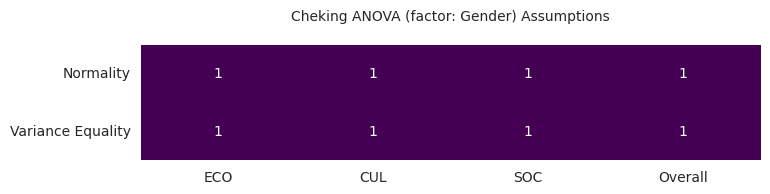

In [ ]:

# Prepare data for normality heatmap
normdf = pd.DataFrame(0, index=['Normality'], columns=normScorG + nonNormScorG)
for col in normScorG: normdf[col] = 1

# Prepare data for variance heatmap
varTestdf = pd.DataFrame(0, index=['Variance Equality'], columns=varEqG + varUneqG)
for col in varEqG: varTestdf[col] = 1

# Combine data for plotting
assumdf = pd.concat([normdf, varTestdf])

# Create the heatmap
plt.figure(figsize=(8, 1.5))
sns.heatmap(assumdf, annot=True, cmap="viridis", cbar=False, fmt='d', annot_kws={'size': 10})
plt.yticks(rotation=0)
plt.title(label='Cheking ANOVA (factor: Gender) Assumptions\n', fontsize=10)

plt.show()

In [ ]:
# 2.2 run anova
sigAnova = []; nonSigAnova = []
for col in normScorG:
    anova = stats.f_oneway(femAnova[col], menAnova[col])
    if anova.pvalue <= alpha5: sigAnova.append(col)
    else: nonSigAnova.append(col)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

score_vars = ['ECO', 'CUL', 'SOC', 'OVERALL']
gender_map = {1: 'Female', 2: 'Male'}

# Prepare data with gender labels
ndf['Gender_Label'] = df['GENDER'].map(gender_map)

# Reshape the data for plotting
ndf_melted = ndf.melt(id_vars=['ID', 'Gender_Label'], value_vars=score_vars, var_name='Score_Variable', value_name='Score')

# Create the combined box plot
plt.figure(figsize=(5, 4))
ax = sns.boxplot(x='Score_Variable', y='Score', hue='Gender_Label')

plt.title('Box Plots of Scores by Gender with Significance')
plt.xlabel('Score Variable')
plt.ylabel('Score (Normalized)')
plt.ylim(0, 1.05) # Extend y-axis limit slightly for annotations
plt.legend(title='Gender')
plt.tight_layout()

# Add significance annotations
anova_results = {
    'ECO': anova_eco,
    'CUL': anova_cul,
    'SOC': anova_soc,
    'OVERALL': anova_overall
}

# Manually specify x-coordinates for annotations based on Score_Variable order
x_coords = {var: i for i, var in enumerate(score_vars)}


for var in score_vars:
    if var == 'ECO':
        p_value = anova_results[var]['p-value'].iloc[0]
    else:
        p_value = anova_results[var]['p-unc'].iloc[0]

    if p_value < alpha5:
        # Add a line above the box plots
        x1, x2 = x_coords[var] - 0.2, x_coords[var] + 0.2 # Adjust line width as needed
        y, h, col = ndf_melted[ndf_melted['Score_Variable'] == var]['Score'].max() + 0.03, 0.02, 'k'
        ax.plot([x1, x1, x2, x2], [y-0.125, y+h, y+h, y-0.005], lw=1, c=col)
        ax.text((x1 + x2) * .5, y + h, "*", ha='center', va='bottom', color=col, fontsize=12)


plt.show()

# Drop the temporary Gender_Label column
ndf.drop('Gender_Label', axis=1, inplace=True)

ValueError: Could not interpret value `Score_Variable` for `x`. Value is a string, but `data` was not passed.

<Figure size 500x400 with 0 Axes>

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

score_vars = ['ECO', 'CUL', 'SOC', 'OVERALL']
gender_map = {1: 'Female', 2: 'Male'}

# Prepare data with gender labels
ndf['Gender_Label'] = df['GENDER'].map(gender_map)

# Reshape the data for plotting
ndf_melted = ndf.melt(id_vars=['ID', 'Gender_Label'], value_vars=score_vars, var_name='Score_Variable', value_name='Score')

# Create the combined box plot using Plotly Express
fig = px.box(ndf_melted, x='Score_Variable', y='Score', color='Gender_Label',
             color_discrete_map={'Female': '#ff0066', 'Male': '#3333cc'},
             title='Box Plots of Scores by Gender with Significance (Plotly)')

# Update layout for better readability
fig.update_layout(
    xaxis_title='Score Variable',
    yaxis_title='Score (Normalized)',
    yaxis=dict(range=[0, 1.05]), # Extend y-axis limit slightly for annotations
    legend_title='Gender',
    width=700,  # Set width similar to seaborn plot
    height=500  # Set height similar to seaborn plot
)

# Add significance annotations and lines
anova_results = {
    'ECO': anova_eco,
    'CUL': anova_cul,
    'SOC': anova_soc,
    'OVERALL': anova_overall
}

annotations = []
shapes = []

# Manually specify x-coordinates for annotations based on Score_Variable order
x_coords = {var: i for i, var in enumerate(score_vars)}


for i, var in enumerate(score_vars):
    if var == 'ECO':
        p_value = anova_results[var]['p-value'].iloc[0]
    else:
        p_value = anova_results[var]['p-unc'].iloc[0]

    if p_value < alpha5:
        # Add a line above the box plots
        x1, x2 = i - 0.2, i + 0.2 # Adjust line width as needed based on x_coords
        y = ndf_melted[ndf_melted['Score_Variable'] == var]['Score'].max() + 0.03

        shapes.append(go.layout.Shape(
            type="line",
            x0=x1, y0=y, x1=x2, y1=y,
            line=dict(color="black", width=1.5,)
        ))

        # Add a star annotation above the line
        annotations.append(dict(
            x=(x1 + x2) / 2,
            y=y,
            text="*",
            showarrow=False,
            yshift=5, # Adjust vertical position of the star above the line
            font=dict(size=12, color="black")
        ))


fig.update_layout(shapes=shapes, annotations=annotations)


fig.show()

# Drop the temporary Gender_Label column
ndf.drop('Gender_Label', axis=1, inplace=True)

In [ ]:
# Map numerical gender to descriptive strings for plotting
gender_map = {1: 'Female', 2: 'Male'}
ndf['Gender_Label'] = df['GENDER'].map(gender_map)

score_vars = ['ECO', 'CUL', 'SOC', 'OVERALL']

fig, axes = plt.subplots(1, 4, figsize=(20, 6))
axes = axes.flatten()

for i, var in enumerate(score_vars):
    sns.violinplot(x='Gender_Label', y=var, data=ndf, ax=axes[i], hue='Gender_Label', palette={'Female': '#ff0066', 'Male': '#3333cc'}, legend=False)
    axes[i].set_title(f'Distribution of {var} Score by Gender')
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel(f'{var} Score (Normalized)')
    axes[i].set_ylim(0, 1) # Set y-axis limits from 0 to 1

plt.tight_layout()
plt.show()

# Drop the temporary Gender_Label column
ndf.drop('Gender_Label', axis=1, inplace=True)

**Normality Assumption Check (by Gender):**

*   Variables with Normal Distribution: {{normScorGCopy}}
*   Variables with Non-Normal Distribution: {{nonNormScorGCopy}}

**Variance Equality Assumption Check (Levene's Test):**

*   Variables with Equal Variance: {{varEqGCopy}}
*   Variables with Unequal Variance: {{varUneqGCopy}}

#Seeing individual analysis

## Coresponding rows to ID

In [ ]:
while True:
    PerID = 5 #input("Enter the ID of the person you want to see (1-31): ")
    try:
        PerID = int(PerID)
        if 1 <= PerID <= 31:
            dfRow = df[df['ID'] == PerID]
            ndfRow = ndf[ndf['ID'] == PerID]
            break
        else: print('IDs are integers from 1 to 31. \nPlease try again.')
    except ValueError: print('Enter an integer ID between 1 to 31. \nPlease try again.')


In [ ]:
display(dfRow)
display(ndfRow)

## PLots

In [ ]:
fcolor = '#ff0066'
mcolor = '#3333cc'
genderColor = fcolor if dfRow['GENDER'].iloc[0] == 1 else mcolor

‌

**PLot of economical status and sococultrual status**

The original demand of our proffsor was to create a 2D plot like this. This plot is more understandble comparing to 3D plot that you will see next.

In [ ]:
# TODO 1: scatterplot for ECO and SOCCUL
fig = px.scatter(ndf, x='ECO', y='SOCCUL', color=df['GENDER'].copy().astype(str), size_max=10,
    color_discrete_map={'1': fcolor, '2': mcolor}, hover_data=['ID'])

# Customize the plot
fig.update_layout(title=dict(text='Dot Plot of Social Status', x=0.5, xanchor='center'),
    xaxis_title='Economical Score', yaxis_title='Cultural & Social Score',
    width=600, height=500,
    xaxis=dict(range=[0, 1]), yaxis=dict(range=[0, 1]),
    legend=dict(title='Gender'))

# Change the labels for the colors in the legend
for scatdata in fig.data:
    if scatdata.name == '1':
        scatdata.name = 'Female'
    else: scatdata.name = 'Male'


# TODO 2: Find the coresponding datapoint to ID + bold it
# Find the coresponding datapoint to ID + bold it
fig.add_trace(px.scatter(ndfRow, x='ECO', y='SOCCUL', hover_data=['ID']).data[0])

fig.show()

‌

**3D pLot of economical, social & cultrul status**


In [ ]:
#TODO 1: interactive 3d plot
fig = px.scatter_3d(ndf, x='ECO', y='CUL', z='SOC',
                    color=df['GENDER'].copy().astype(str),
                    color_discrete_map={'1': '#ff0066', '2': '#3333cc'},
                    size_max=10, hover_data=['ID'])

# Customize the plot
fig.update_layout(title=dict(text='Dot Plot of Social Status', x=0.5, xanchor='center'),
    scene = dict(xaxis_title='Economical Score', yaxis_title='Cultural Score', zaxis_title='Social Score',
                 xaxis=dict(range=[0,1]), yaxis=dict(range=[0,1]), zaxis=dict(range=[0,1])))

# Change the labels for the colors in the legend
for plot3d in fig.data:
    if plot3d.name == '1':
        plot3d.name = 'Female'
    else: plot3d.name = 'Male'


#TODO 2: Find the coresponding datapoint to ID + point to it with an arrow
fig.update_layout(scene=dict
    (annotations=[dict (x=ndfRow['ECO'].iloc[0], y=ndfRow['CUL'].iloc[0], z=ndfRow['SOC'].iloc[0],
    #arrow:
    showarrow=True, arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='black',
    # text and textbox detail:
    text="Your Data Point",
    bgcolor="rgba(255, 255, 255, 0.8)", bordercolor="#c7c7c7", borderwidth=2, borderpad=4)]))

fig.show()

‌

## Overall comprasion